In [147]:
import pybaseball as pb
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Polygon
import numpy as np
import os

In [2]:
# pull stats on all batters with >PA in 2021
df = pb.batting_stats(2021, qual=200)

In [70]:
# clean up data for plotting
plot_df = (
    df
     .pipe(lambda df: df[["Name", "Age", "Balls", "BB", "OPS"]]) # get just the columns we need
#      .pipe(lambda df: df.append({"Name" : "Your Mom", "Age": 69, "Balls" : 420, "BB" : 0, "OPS": 0}, ignore_index=True)) # add your mama joke
)

In [199]:
# export plot_df to csv for interactive plot
plot_df.to_csv("balls_seen.csv", index=False)

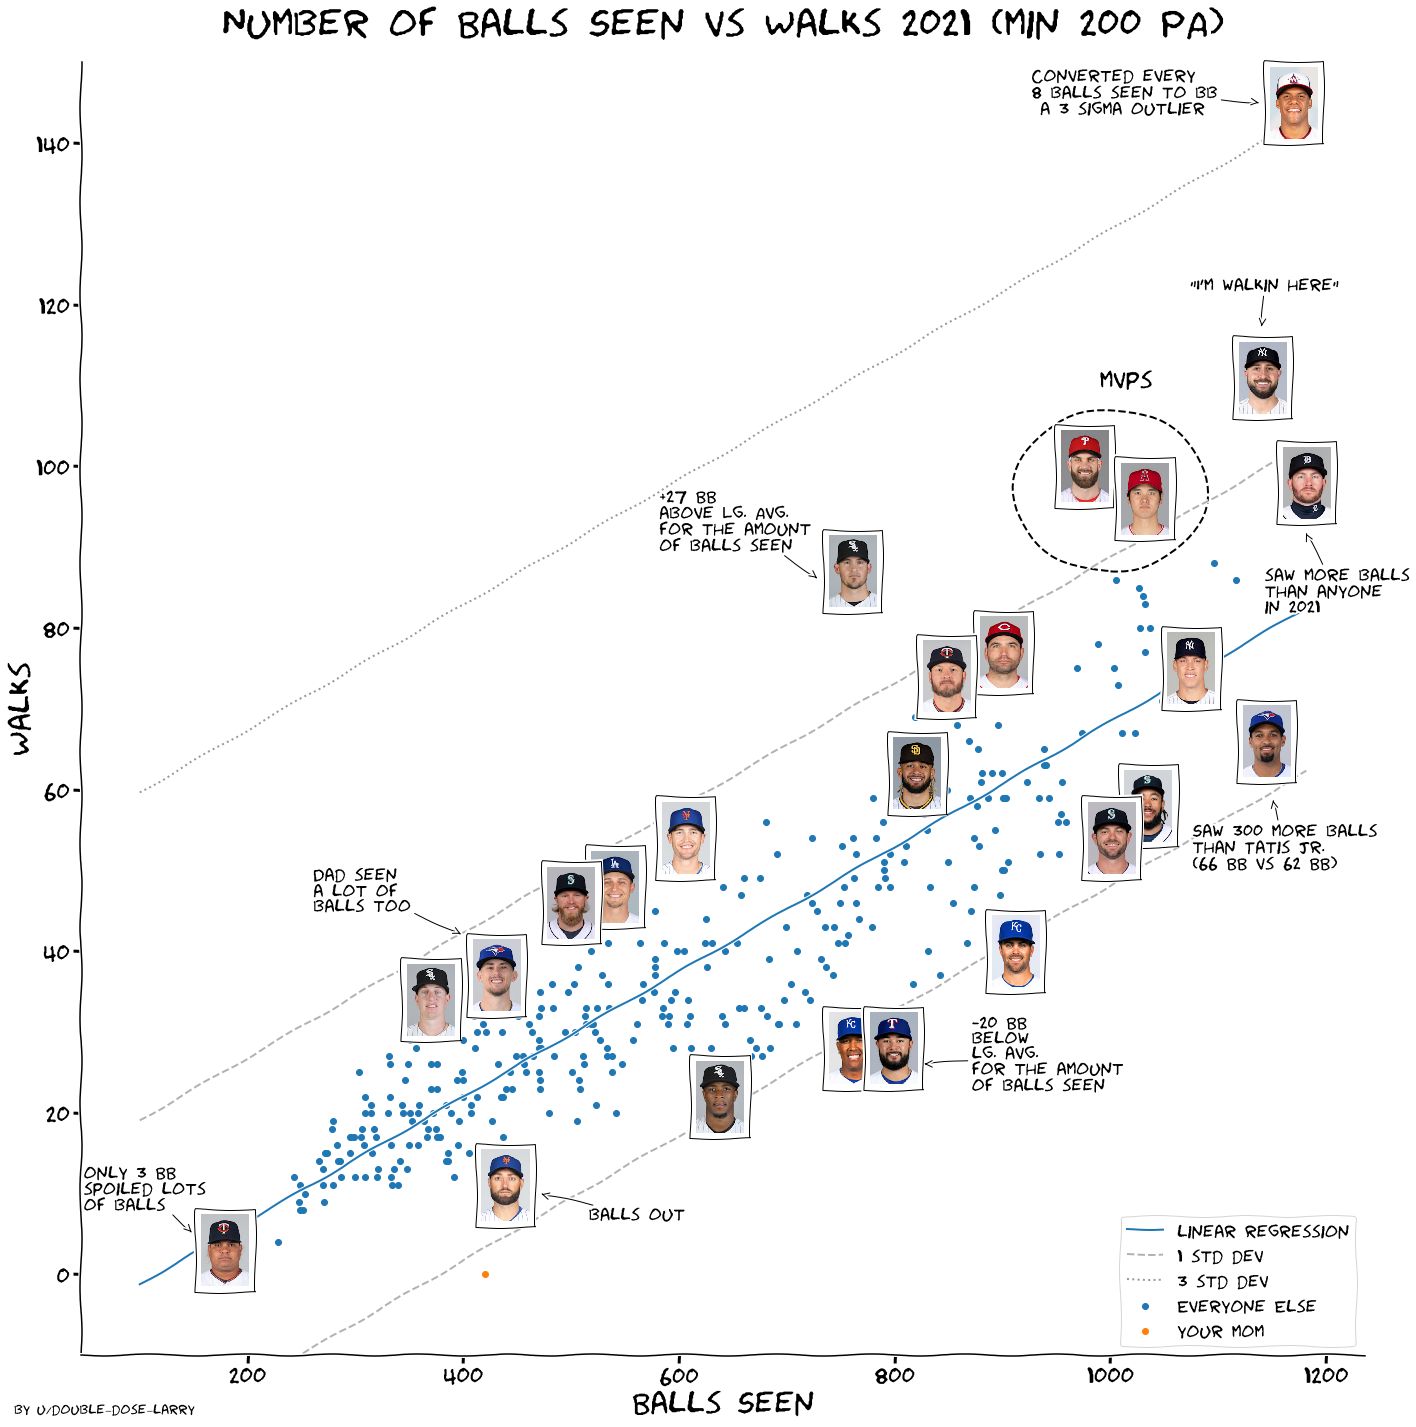

In [198]:
# plotting utils
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
def getImage(path):
    return OffsetImage(plt.imread(path), zoom=.4)

# decided what faces I want to highlight and downloaded the face into the directory as jpgs
notable_names = [f.split(".jpg")[0] for f in os.listdir(path="notable_faces") if 'jpg' in f]
df_notables = plot_df[plot_df["Name"].isin(notable_names)]

# start plotting
plt.xkcd()

f, ax = plt.subplots( figsize=(20,20))

Y = plot_df["BB"]
X = plot_df["Balls"]

ax.scatter(X, Y, label="Everyone Else")

# add 'your mom' joke
ax.scatter(420, 0, label="your mom")


#plot faces
imgs = [
    ax.add_artist(
        AnnotationBbox(getImage(f'notable_faces/{plr.Name}.jpg'),
                      (plr.Balls, plr.BB),
                       frameon=True
                      )
    )
    for plr in df_notables.itertuples()
]


# add regression and standard deviation lines
#o btain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(X, Y, 1)

#add linear regression lines to scatterplot and
x_linspace = np.linspace(100, X.max(), 100)
y_sigma = Y.std()
plt.plot(x_linspace, m*x_linspace+b, label="linear regression")
plt.plot(x_linspace, m*x_linspace+(b + y_sigma), c="k", ls="--", alpha=0.3, label="1 std dev") # one standard deviation up
# plt.plot(x_linspace, m*x_linspace+(b + ( 2 * y_sigma)), c="k", ls="--", alpha=0.3) # two standard deviation up
plt.plot(x_linspace, m*x_linspace+(b + ( 3 * y_sigma)), c="k", ls=":", alpha=0.4, label="3 std dev") # three standard deviation up
plt.plot(x_linspace, m*x_linspace+(b - Y.std()), c="k", ls="--", alpha=0.3) # one standard deviation up



#annotations

# annotate Juan Soto
ax.annotate(
    "Converted every\n8 balls seen to bb\n a 3 sigma outlier",
    (1140, 145),
    size=18,
    xytext = (-230, -10),
        textcoords="offset pixels",
        arrowprops=dict(
                     arrowstyle="->")
)

# annotate Willians Astudillo
ax.annotate(
    "only 3 BB\nspoiled lots\nof balls",
    (150, 5),
    size=18,
    xytext = (-110, 25),
        textcoords="offset pixels",
        arrowprops=dict(
                     arrowstyle="->")
)

# annotate Kevin Pillar
ax.annotate(
    "balls out",
    (470, 10),
    size=18,
    xytext = (50, -25),
        textcoords="offset pixels",
        arrowprops=dict(
                     arrowstyle="->")
)

# annotate Cavan Biggio
ax.annotate(
    "Dad seen\na lot of\nballs too",
    (400, 42),
    size=18,
    xytext = (-150, 25),
        textcoords="offset pixels",
        arrowprops=dict(
                     arrowstyle="->")
)

# annotate Isiah Kiner-Falefa
ax.annotate(
    "-20 BB \nbelow\nlg. avg.\nfor the amount\nof balls seen",
    (825, 26),
    size=18,
    xytext = (50, -25),
        textcoords="offset pixels",
        arrowprops=dict(
                     arrowstyle="->")
)

# annotate Robbie Grossman
ax.annotate(
    "saw more balls\nthan anyone\nin 2021",
    (1180, 92),
    size=18,
    xytext = (-40, -80),
        textcoords="offset pixels",
        arrowprops=dict(
                     arrowstyle="->")
)

# annotate Grandal
ax.annotate(
    "+27 BB\nabove Lg. Avg.\nfor the amount\nof balls seen",
    (730, 86),
    size=18,
    xytext = (-160, 30),
        textcoords="offset pixels",
        arrowprops=dict(
                     arrowstyle="->")
)

# annotate Marcus Semien
ax.annotate(
    "Saw 300 more balls\nthan Tatis Jr.\n(66 BB vs 62 BB)",
    (1150, 59),
    size=18,
    xytext = (-80, -70),
        textcoords="offset pixels",
        arrowprops=dict(
                     arrowstyle="->")
)

# annotate Joey Gallo
ax.annotate(
    """ "I'm walkin here" """,
    (1140, 117),
    size=18,
    xytext = (-80, 40),
        textcoords="offset pixels",
        arrowprops=dict(
                     arrowstyle="->")
)

# annotate Bryce Harper and Shohei Ohtani
ax.add_patch(Ellipse(xy=(1000, 97), 
                     width=180, 
                     height=20, fill=False, ls="--", lw=2))
ax.annotate("mvps", (990, 110), size=25)


# axis labels and stuff
ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 24)
plt.ylabel("Walks", size=32)
plt.xlabel("Balls Seen", size=32)
plt.ylim([-10, 150])

# rest of the plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend(loc="lower right", prop={'size': 18})
plt.title("Number of Balls Seen vs Walks 2021 (min 200 PA)", size=40, pad=30)
plt.tight_layout()
plt.annotate("by u/double_dose_larry", (.01,.01), xycoords='figure fraction')
plt.savefig("balls_seen.png")

In [73]:
b/m

-115.88481192072258

In [74]:
ball_seen_needed = lambda y:  (y+b)/m

In [75]:
ball_seen_needed(41)

413.759719356711